## Visualization Kaplan Meier Curves
#### Kaplan Meier Curve serves to show data, and the chance that the particular point will experience the event at that time.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Kaplan Meier Function
def kaplan(N, E, S):
    return (((N-E)/N)*S)

In [33]:
# Define the number of time points there will be on the graph.
time_points = 100
end_time = 240
noncensor_rate = 0.25

# Time Label
time_label = "Months"
y_label = "Survival Probability"
graph_title = f"Kaplan-Meier Survival Curve Over {end_time} {time_label}"

In [34]:
# Randomly generate number of time_points from 0 to end_time.
time = np.random.randint(1, end_time, time_points)

# Add these values to a column of a blank pandas dataframe and sort them.
df = pd.DataFrame(time, columns=["Time"])
df = df.sort_values(by="Time")

# Create a new column that labels "-" or "+" for each time point. Make sure that the number of "-" matches the survival rate.
df["Event"] = np.where(df.index < time_points*noncensor_rate, "-", "+")

# Remove index
df.reset_index(drop=True, inplace=True)
df

,Time,Event
0,1,+
1,1,+
2,4,+
3,4,+
4,4,+
...,...,...
95,232,+
96,234,+
97,236,+
98,238,+


In [35]:
# Survival probability
survival = 1

# Loop through the dataframe rows.
for i in range(len(df)):
    # If the event is "+" then calculate the survival probability.
    if df["Event"][i] == "-":
        # Retrieve the number of rows after the current row in the dataframe.
        N = len(df) - i
        
        # Retrieve the number of values that have the same time point as the current row, as long as "-" is in the event column.
        E = len(df[(df["Time"] == df["Time"][i]) & (df["Event"] == "-")])
        
        # Calculate the survival probability.
        survival = kaplan(N, E, survival)
        
        # Add the survival probability to the dataframe, for the current row.
        df.loc[i, "Survival"] = survival
    else:
        # Set the survival to a np.nan value.
        df.loc[i, "Survival"] = np.nan

df

,Time,Event,Survival
0,1,+,NaN
1,1,+,NaN
2,4,+,NaN
3,4,+,NaN
4,4,+,NaN
...,...,...,...
95,232,+,NaN
96,234,+,NaN
97,236,+,NaN
98,238,+,NaN


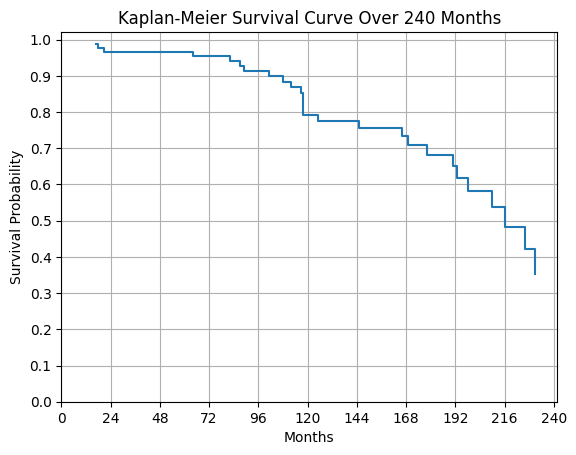

In [36]:
# Remove the rows that have a survival probability of np.nan.
df = df.dropna()

# Graph the data as a Kaplan-Meier curve.
plt.step(df["Time"], df["Survival"], where="post")

# Add labels to the graph.
plt.xlabel(time_label)
plt.ylabel(y_label)
plt.title(graph_title)

# Set the ticks depending on the number of time points:
# Divisible by 10: Show 10.
# Divisible by 5: Show 5.
# Divisible by 2: Show 2.
# In this order
if time_points % 10 == 0:
    plt.xticks(np.arange(0, end_time+1, end_time//10))
elif time_points % 5 == 0:
    plt.xticks(np.arange(0, end_time+1, end_time//5))
elif time_points % 2 == 0:
    plt.xticks(np.arange(0, end_time+1, end_time//2))
else:
    plt.xticks(np.arange(0, end_time+1, end_time//time_points))

# Set the y-ticks to be between 0 and 1.
plt.yticks(np.arange(0, 1.1, 0.1))

# Grid
plt.grid(True)